In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
from termcolor import colored
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from natsort import natsorted

In [3]:
# Display pandas df without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [4]:
# Globally setting font sizes via rcParams should be done with 

#paper params
params = {
    'font.size': 18,
    'figure.figsize': (15,5),
    'figure.dpi': 80,
    'savefig.dpi': 300,
    'legend.fontsize': 11,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'axes.labelsize': 11,
    'axes.axisbelow': True
         }

# #test params
# params = {
#     'font.size': 8,
#     'figure.figsize': (15,3),
#     'figure.dpi': 80,
#     'savefig.dpi': 80,
#     'legend.fontsize': 8,
#     'xtick.labelsize': 8,
#     'ytick.labelsize': 8,
#     'axes.labelsize': 8,
#     'axes.axisbelow': True
#          }


plt.rcParams.update(params)

# The defaults can be restored using
# plt.rcParams.update(plt.rcParamsDefault)

### Numpy array, select even/odd columns

[:,::2]    Xs cols indexing


[:,1::2]   Ys cols indexing

### ARK —> ARGoS coordinate system

In [5]:
ARENA_SIZE = 1875
M_TO_PIXEL = 20
CM_TO_M = 100

In [6]:
def x_transform(x_array):
    x_trans = ((x_array - (ARENA_SIZE/2))/ M_TO_PIXEL)/CM_TO_M
    return x_trans
    

In [7]:
def y_transform(y_array):
    y_trans = (((ARENA_SIZE/2) - y_array)/ M_TO_PIXEL) /CM_TO_M
    return y_trans

In [8]:
def check_float(potential_float):
    try:
        float(potential_float)
        return True

    except ValueError:
        return False

### Exp parameters

In [9]:
fieldsPerKilobot = 6
experiment_length = 1800

In [10]:
def generate_kiloLOG_label(n_rob):
    kiloLOG_label = ['time']
    for i in range(0, n_rob*fieldsPerKilobot, fieldsPerKilobot):
        kiloLOG_label += ['id' + str(i // fieldsPerKilobot), 'col' + str(i // fieldsPerKilobot), 'posx' + str(i // fieldsPerKilobot), 'posy' + str(i // fieldsPerKilobot), 'ori' + str(i // fieldsPerKilobot), 'state' + str(i // fieldsPerKilobot)]
    
    return kiloLOG_label

In [11]:
def generate_kiloPOS_label(n_rob):
    kiloPOS_label = []
    for i in range(n_rob):
        kiloPOS_label += ["posx"+str(i),"posy"+str(i)]
        
    return kiloPOS_label

In [12]:
bin_edges = np.linspace(0, 0.45, 20)

# get_occurrences : returns weighted density histogram
def get_occurrences(distances, edges, runs):
    hist_val = np.array([])
    for x in distances:
        hist, _ = np.histogram(x, edges)
        #     print(i,hist)
        hist_val = np.vstack([hist_val, hist]) if hist_val.size else hist

    for i in range(edges[1:].size):
        area = np.pi * (np.square(edges[1:][i]) - np.square(edges[1:][i - 1])) if i else np.pi * np.square(edges[1:][i])
        hist_val[:, i] = np.true_divide(hist_val[:, i], area * runs)

    return hist_val

In [13]:
def time_plot_histogram(values, y_edges, alpha, rho, num_robots, storagePath):
    y_edges = y_edges.round(decimals=3)
    fig = plt.figure()
    # plt.ylabel('Distance from origin')
    # plt.xlabel('time(s)')
    # plt.legend()
    yticks = y_edges
    # plt.imshow(distances,interpolation='none')

    # print("num_robots:", num_robots, end="")
    if num_robots == "10":
        v_max = 25
    elif num_robots == "20":
        v_max = 50
    elif num_robots == "50":
        v_max = 120
    elif num_robots == "100":
        v_max = 200
    else:
        print("Type", type(num_robots))

    # print("\t v_max:", v_max)
    ax = sns.heatmap(values, yticklabels=yticks, cmap="viridis", vmin=0, vmax=v_max)
    ax.set_title(
        "Robots diffusion with " + r"$\bf{Robots}$:" + num_robots + r" $\bf{\rho}:$" + rho + " and " + r"$\bf{\alpha}:$" + alpha)
    ax.set_ylabel('distance from the origin')
    ax.set_xlabel('time')
    file_name = "dist_heat_robots_%s_rho_%s_alpha_%s.png" % (num_robots, rho, alpha)
    
#     plt.savefig(storagePath + '/' + file_name)
#     plt.close(fig)
    plt.show()

In [14]:
# CWD = os.getcwd()
# folder_experiments = 'results'

In [17]:
main_folder = os.getcwd() #attenzione pycharm scprits not in the same dir

simpleExperiment_folder = 'results/ALL/Simulated/simple_experiment_100_runs'
biasExperiment_folder = 'results/ALL/Simulated/bias_experiment_100_runs'
randomAngle_folder = 'results/ALL/Simulated/random_angle_100_runs'
bouncingAngle_folder = 'results/ALL/Simulated/bouncing_angle_100_runs'

real_folder = 'results/ALL/Real'
# simulated_folder = 'results/ALL/Simulated'

## Main - Real experiments

DirName: /home/luigi/Documents/ARGoS/argos-LMCRW-script/results/ALL/Real/robots#20_alpha#2.0_rho#0.0
	 num_robots 20, rho 0.0, alpha 2.0
	 Num of runs:  15
	 differentSeeds_pos.shape: [time_lenght, num_robotXnum_runs, 2] (1800, 300, 2)


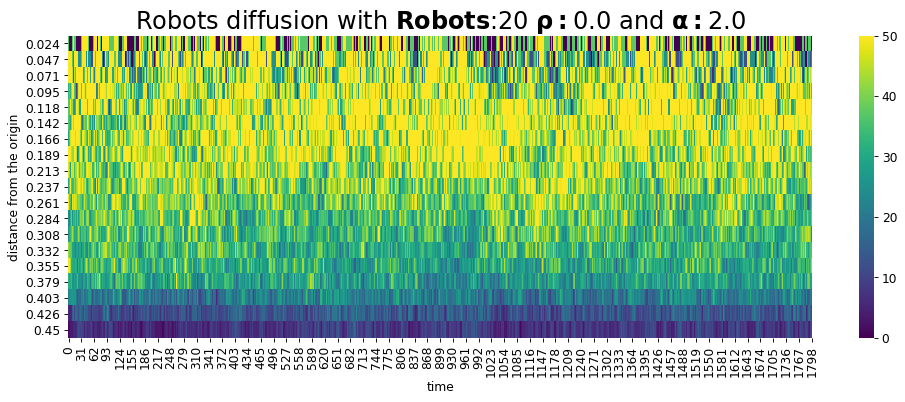

DirName: /home/luigi/Documents/ARGoS/argos-LMCRW-script/results/ALL/Real/robots#20_alpha#2.0_rho#0.9
	 num_robots 20, rho 0.9, alpha 2.0
	 Num of runs:  10
	 differentSeeds_pos.shape: [time_lenght, num_robotXnum_runs, 2] (1800, 200, 2)


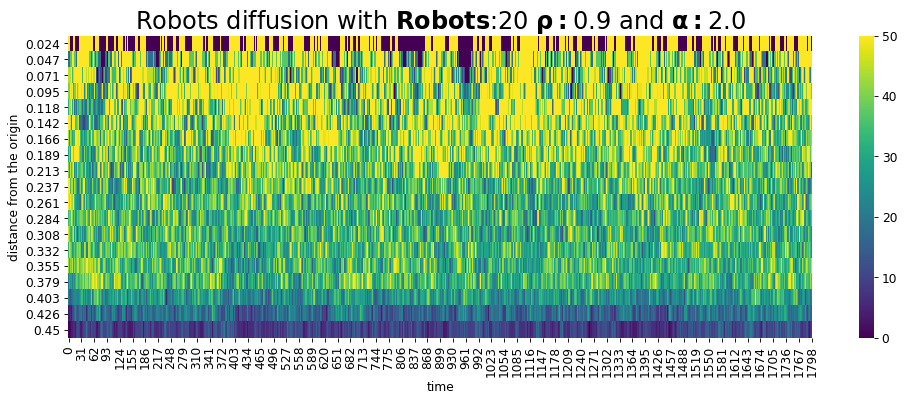

DirName: /home/luigi/Documents/ARGoS/argos-LMCRW-script/results/ALL/Real/robots#10_alpha#2.0_rho#0.9
	 num_robots 10, rho 0.9, alpha 2.0
	 Num of runs:  20
	 differentSeeds_pos.shape: [time_lenght, num_robotXnum_runs, 2] (1800, 200, 2)


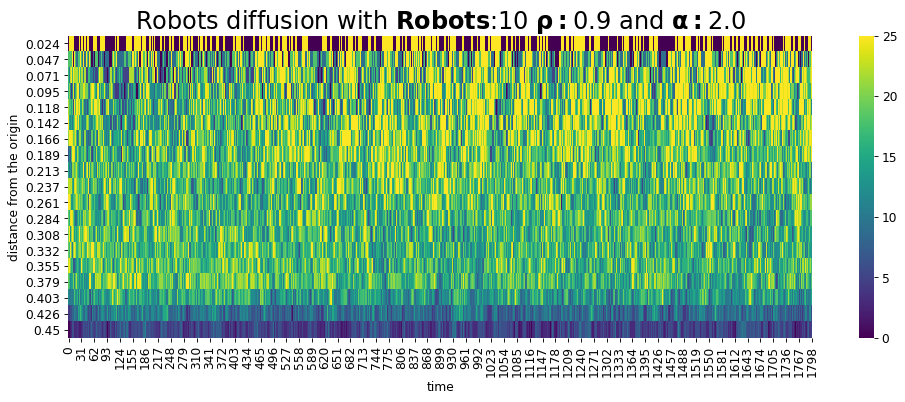

DirName: /home/luigi/Documents/ARGoS/argos-LMCRW-script/results/ALL/Real/robots#10_alpha#2.0_rho#0.0
	 num_robots 10, rho 0.0, alpha 2.0
	 Num of runs:  10
	 differentSeeds_pos.shape: [time_lenght, num_robotXnum_runs, 2] (1800, 100, 2)


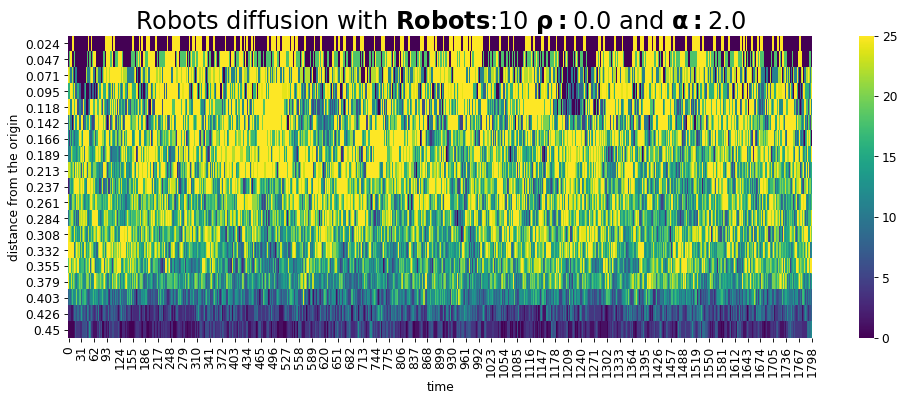

In [32]:
for dirName, subdirList, fileList in os.walk(os.path.join(main_folder,real_folder)):
    
    num_robots = "-1"
    rho = -1.0
    alpha = -1.0
    elements = dirName.split("/")[-1].split("_")
#     print(colored("DirName:", 'blue'),dirName)
#     print(elements)
    for e in elements:
        if e.startswith("robots"):
            num_robots = e.split("#")[-1]

        if (e.startswith("rho")):
            if check_float(e.split("#")[-1]): rho = float(e.split("#")[-1])
        if (e.startswith("alpha")):
            if check_float(e.split("#")[-1]): alpha = float(e.split("#")[-1])
    
    if num_robots == "-1" or rho == -1.0 or alpha == -1:
        continue
    
    print(colored("DirName:", 'blue'),dirName)
    print('\t num_robots {}, rho {}, alpha {}'.format(num_robots, rho, alpha))
    
    runs = len([f for f in fileList if
                    (os.path.isfile(os.path.join(dirName, f)) and f.endswith('kilopos.txt'))])
    print('\t Num of runs: ', runs)

    rho_str = str(rho)
    alpha_str = str(alpha)
    
        
    differentSeeds_pos = np.array([])
    
    for filename in fileList:
        if filename.endswith('kilopos.txt'):
#             print(colored("filename:", 'blue'),filename)
            if not os.path.getsize(os.path.join(dirName, filename)) > 0:
                print("Error, empty file at:" + os.path.join(fileList, filename))
                continue
            df_single = pd.read_csv(os.path.join(dirName, filename), sep="\t", header=None)
            kiloLOG_label = generate_kiloLOG_label(int(num_robots))
            df_single.columns = kiloLOG_label
#             df_single = df_single[df_single['time'] < experiment_length+1]
            kiloPOS_label = generate_kiloPOS_label(int(num_robots))
    
#             '''*****************************************************************************************************'''    
#             #così è diviso in ordine del tempo
            np_position = df_single[kiloPOS_label].to_numpy()[:experiment_length]
            np_position[:,::2] = x_transform(np_position[:,::2])
            np_position[:,1::2] = y_transform(np_position[:,1::2])
            np_position = np_position.reshape(np_position.shape[0], int(num_robots), -1)
#             np_position = np_position[:experiment_length+1]
            
            differentSeeds_pos = np.column_stack([differentSeeds_pos, np_position]) if differentSeeds_pos.size else np_position

    print('\t differentSeeds_pos.shape: [time_lenght, num_robotXnum_runs, 2]', differentSeeds_pos.shape)
    x_pos = differentSeeds_pos[:,:,0]
    y_pos = differentSeeds_pos[:,:,1]
    distances = np.sqrt(x_pos ** 2 + y_pos ** 2)
    occurrences = get_occurrences(distances, bin_edges, runs)
    time_plot_histogram(occurrences.T, bin_edges[1:], alpha_str, rho_str, num_robots, os.path.join(main_folder, 'Plots'))

### Main - Simulated experiments 

In [25]:
for dirName, subdirList, fileList in os.walk(os.path.join(main_folder,randomAngle_folder)):
    
    num_robots = "-1"
    rho = -1.0
    alpha = -1.0
    elements = dirName.split("/")[-1].split("_")
#     print(colored("DirName:", 'blue'),dirName)
#     print(elements)
    for e in elements:
        if e.startswith("robots"):
            num_robots = e.split("#")[-1]

        if (e.startswith("rho")):
            if check_float(e.split("#")[-1]): rho = float(e.split("#")[-1])
        if (e.startswith("alpha")):
            if check_float(e.split("#")[-1]): alpha = float(e.split("#")[-1])
    
    if num_robots == "-1" or rho == -1.0 or alpha == -1:
        continue
    
    print(colored("DirName:", 'blue'),dirName)
    print('num_robots {}, rho {}, alpha {}'.format(num_robots, rho, alpha), end='\n\n')
    
    runs = len([f for f in fileList if
                    (os.path.isfile(os.path.join(dirName, f)) and f.endswith('position.tsv'))])
    print('Runs: ', runs)

    rho_str = str(rho)
    alpha_str = str(alpha)
       
        
    differentSeeds_pos = np.array([])
    
    for filename in fileList:
        if filename.endswith('position.tsv'):
            print('\t', filename)
            if not os.path.getsize(os.path.join(dirName, filename)) > 0:
                print("Error, empty file at:" + os.path.join(fileList, filename))
                continue
            df_single = pd.read_csv(os.path.join(dirName, filename), sep="\t", header=None)
            kiloLOG_label = generate_kiloLOG_label(int(num_robots))
            df_single.columns = kiloLOG_label
#             df_single = df_single[df_single['time'] < experiment_length+1]
            kiloPOS_label = generate_kiloPOS_label(int(num_robots))
    
#             '''*****************************************************************************************************'''    
#             #così è diviso in ordine del tempo
            print('df_single.shape', df_single.shape)
            np_position = df_single[kiloPOS_label].to_numpy()[:experiment_length]
            print('np_position.shape:', np_position.shape)
            np_position = np_position.reshape(np_position.shape[0], int(num_robots), -1)
            print('np_position.reshape.shape:', np_position.shape)
#             np_position = np_position[:experiment_length+1]
            
            differentSeeds_pos = np.column_stack([differentSeeds_pos, np_position]) if differentSeeds_pos.size else np_position

    print('\t differentSeeds_pos.shape:', differentSeeds_pos.shape)
    x_pos = differentSeeds_pos[:,:,0]
    y_pos = differentSeeds_pos[:,:,1]
    print('np.sqrt(x_pos ** 2 + y_pos ** 2).shape', np.sqrt(x_pos ** 2 + y_pos ** 2).shape)
    distances = np.sqrt(x_pos ** 2 + y_pos ** 2)
    occurrences = get_occurrences(distances, bin_edges, runs)
    time_plot_histogram(occurrences.T, bin_edges[1:], alpha_str, rho_str, num_robots, os.path.join(main_folder, 'Plots'))
    
    break

DirName: /home/luigi/Documents/ARGoS/argos-LMCRW-script/results/ALL/Simulated/random_angle_100_runs/2021-09-22_robots#100_alpha#1.8_rho#0.9_1800
num_robots 100, rho 0.9, alpha 1.8

Runs:  100
	 seed#46_position.tsv


ValueError: Length mismatch: Expected axis has 182 elements, new values have 601 elements

In [30]:
np_position = np.load('/home/luigi/Documents/ARGoS/argos-LMCRW-script/results/ALL/pos_pkl/Simulated/random_angle_100_runs/random_angle_100_runs_2020-07-03_robots#10_alpha#1.2_rho#0.0_1800simulated_pos.npy')

In [31]:
np_position.shape

(181, 1000, 2)

In [ ]:
distances.shape

In [ ]:
# distances[0]

In [ ]:
bin_edges

In [ ]:
bin_edges[1:][0]

In [ ]:
occurrences = get_occurrences(distances, bin_edges, runs)

In [ ]:
occurrences.shape

In [ ]:
num_robots

In [ ]:
time_plot_histogram(occurrences.T, bin_edges[1:], alpha_str, rho_str, num_robots, os.path.join(CWD, 'Plots'))

In [ ]:
differentSeeds_pos[0].shape